# **Import Required Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score



# **Load the Mall Customers Dataset**

In [8]:
df=pd.read_csv("/content/Mall_Customers.csv")

# **Explore Dataset**

In [9]:
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Summary Statistics:
 

# **Select Features (Income and Spending Score)**

In [10]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# **Scale the Features**

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Determine Optimal k

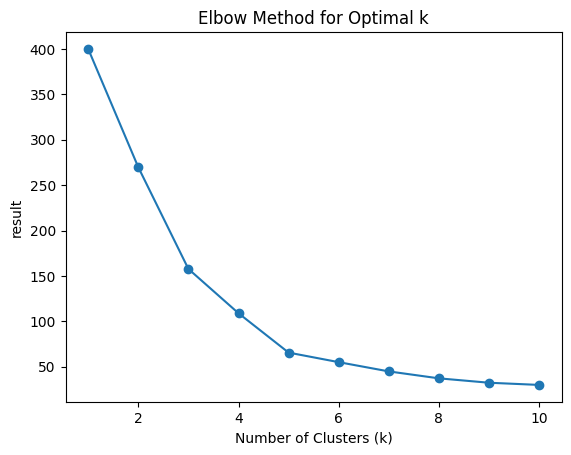

In [13]:
result = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    result.append(kmeans.inertia_)

plt.plot(K, result, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("result")
plt.title("Elbow Method for Optimal k")
plt.show()


# Apply K-Means Clustering

In [15]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# Visualize K-Means Clusters

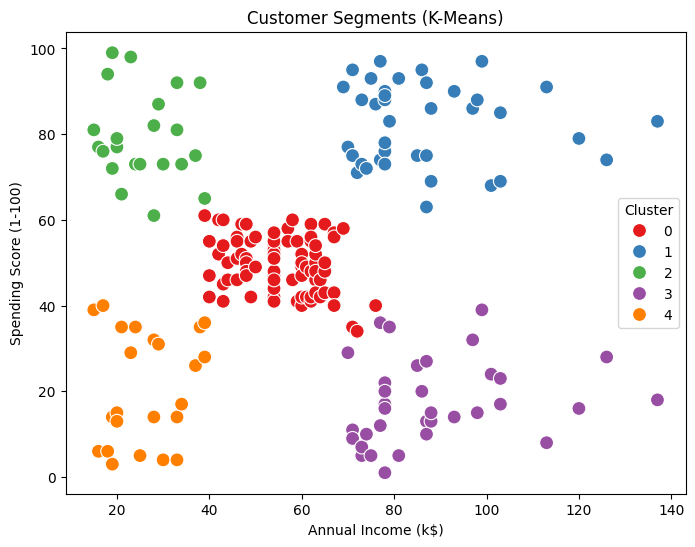

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1", s=100)
plt.title("Customer Segments (K-Means)")
plt.show()


# Analyze Average Income and Spending per Cluster

In [17]:
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# **BONUS**

# Apply DBSCAN Clustering

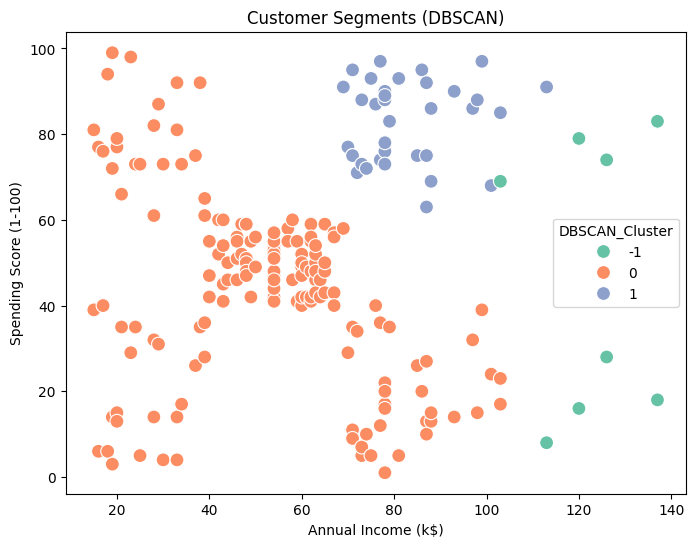

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = db_clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="DBSCAN_Cluster", palette="Set2", s=100)
plt.title("Customer Segments (DBSCAN)")
plt.show()